DISEASE CLASSIFICATION USING SYMPTOMS

Importing Libraries

In this section, necessary libraries are imported to perform various tasks such as data manipulation, text preprocessing, machine learning, and visualization.

In [ ]:
# Importing libraries

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
# Download nltk resources

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Loading the Dataset

In [ ]:
# Load the dataset

data = pd.read_csv('Symptom2Disease.csv')

About the Dataset¶
The dataset consists of 1200 datapoints and has two columns: "label" and "text".

label : contains the disease labels text : contains the natural language symptom descriptions.

The dataset comprises 24 different diseases, and each disease has 50 symptom descriptions, resulting in a total of 1200 datapoints.

The following 24 diseases have been covered in the dataset:

Psoriasis, Varicose Veins, Typhoid, Chicken pox, Impetigo, Dengue, Fungal infection, Common Cold, Pneumonia, Dimorphic Hemorrhoids, Arthritis, Acne, Bronchial Asthma, Hypertension, Migraine, Cervical spondylosis, Jaundice, Malaria, Urinary tract infection, Allergy, Gastroesophageal reflux disease, Drug reaction, Peptic ulcer disease, Diabetes

Understanding the data

In [ ]:
# Displaying the dataset

data

,Unnamed: 0,label,text
0,0,Psoriasis,I have been experiencing a skin rash on my arm...
1,1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,2,Psoriasis,I have been experiencing joint pain in my fing...
3,3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,4,Psoriasis,"My nails have small dents or pits in them, and..."
...,...,...,...
1195,295,diabetes,I'm shaking and trembling all over. I've lost ...
1196,296,diabetes,"Particularly in the crevices of my skin, I hav..."
1197,297,diabetes,I regularly experience these intense urges and...
1198,298,diabetes,"I have trouble breathing, especially outside. ..."


In [ ]:
data.drop(columns=["Unnamed: 0"], inplace=True)

In [ ]:
data

,label,text
0,Psoriasis,I have been experiencing a skin rash on my arm...
1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,Psoriasis,I have been experiencing joint pain in my fing...
3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,Psoriasis,"My nails have small dents or pits in them, and..."
...,...,...
1195,diabetes,I'm shaking and trembling all over. I've lost ...
1196,diabetes,"Particularly in the crevices of my skin, I hav..."
1197,diabetes,I regularly experience these intense urges and...
1198,diabetes,"I have trouble breathing, especially outside. ..."


In [ ]:
# Concise summary of DataFrame

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1200 non-null   object
 1   text    1200 non-null   object
dtypes: object(2)
memory usage: 18.9+ KB


In [ ]:
# Check for null values

data.isnull().sum()

label    0
text     0
dtype: int64

In [ ]:
# Display column names

data.columns

Index(['label', 'text'], dtype='object')

In [ ]:
data.value_counts()

label                    text                                                                                                                                                                                                                                                
Jaundice                 I've been feeling extremely scratchy, sick, and worn out. In addition, I've lost weight and have a temperature. My urine is dark, and my skin has turned yellow. Additionally, I have been experiencing stomach pain.                                   4
Dimorphic Hemorrhoids    I've been constipated and it's really hard to go to the bathroom. When I do go, it hurts and my stool has been bloody. I've also been having some pain in my butt and my anus has been really itchy and irritated.                                      3
Arthritis                I've been feeling really weak in my muscles and my neck has been really stiff. My joints have been swelling up and it's hard for me to move around without 

In [ ]:
# Extracting 'label' and 'text' columns from the 'data' DataFrame

labels = data['label']  # Contains the labels or categories associated with the text data
symptoms = data['text']  # Contains the textual data (e.g., symptoms, sentences) for analysis

Text Preprocessing

Symptoms text is preprocessed, including tokenization, converting text to lowercase, and removing stopwords and non-alphabetic characters.

In [ ]:
# Text Preprocessing

stop_words = set(stopwords.words('english'))

In [ ]:
# Text Preprocessing Function

def preprocess_text(text):
    # Tokenization
    words = word_tokenize(text.lower())
    # Removing stopwords and non-alphabetic characters
    words = [word for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(words)

In [ ]:
# Apply preprocessing to symptoms

preprocessed_symptoms = symptoms.apply(preprocess_text)

Some Visualizations about the Data

Word Cloud for symptoms:

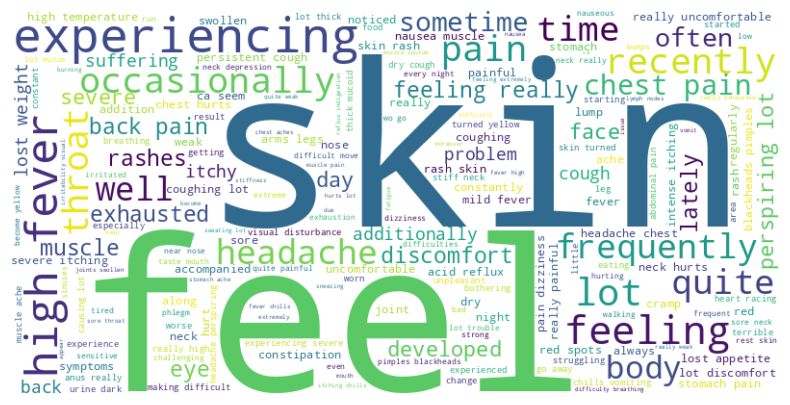

In [ ]:
# Generate Word Cloud for symptoms
all_text = ' '.join(preprocessed_symptoms)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)


# Plotting Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Bar Chart for Disease Distribution:

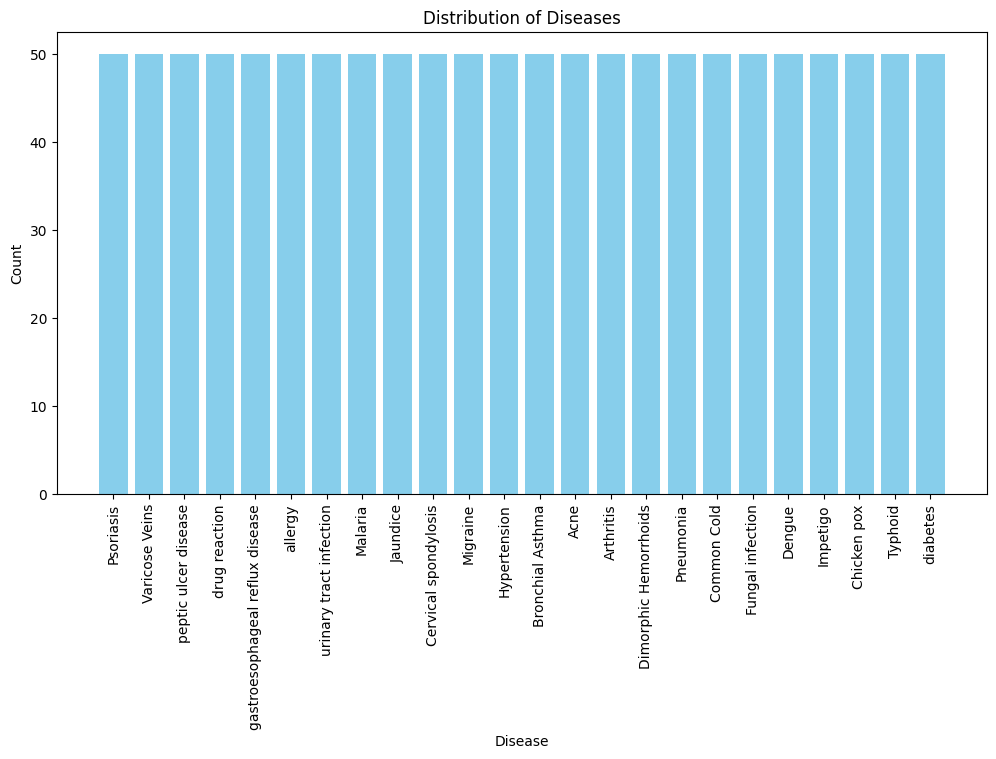

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each disease
disease_counts = data['label'].value_counts()

# Plotting a bar chart
plt.figure(figsize=(12, 6))
plt.bar(disease_counts.index, disease_counts.values, color='skyblue')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.title('Distribution of Diseases')
plt.xticks(rotation=90)
plt.show()

Word Cloud for Common Symptoms:

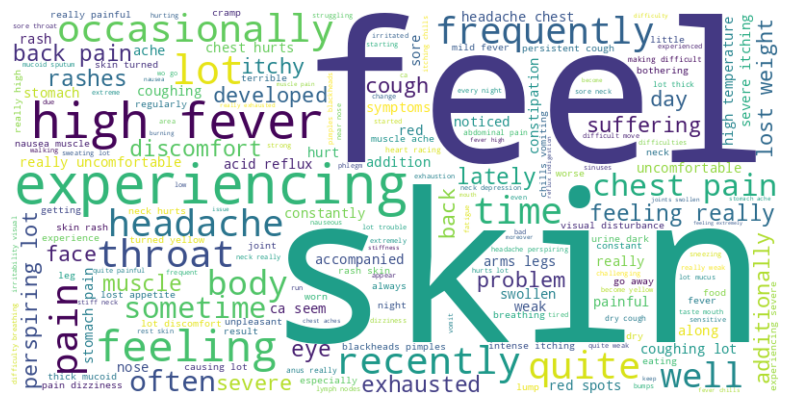

In [ ]:
from wordcloud import WordCloud

# Combine all symptoms into a single string
all_text = ' '.join(preprocessed_symptoms)

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Feature Extraction using TF-IDF

TF-IDF (Term Frequency-Inverse Document Frequency) vectors are generated from the preprocessed symptoms. This step converts text data into numerical features suitable for machine learning models.

In [ ]:
# Feature Extraction using TF-IDF

tfidf_vectorizer = TfidfVectorizer(max_features=1500)  # You can adjust max_features based on your dataset size
tfidf_features = tfidf_vectorizer.fit_transform(preprocessed_symptoms).toarray()

Splitting Data

The dataset is split into training and testing sets, with 80% of the data used for training the model and 20% for testing its performance.

In [ ]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(tfidf_features, labels, test_size=0.2, random_state=42)

KNN Model Training

A K-Nearest Neighbors (KNN) classifier is trained using the TF-IDF features and corresponding disease labels from the training set.

In [ ]:
# KNN Model Training

knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) based on your dataset
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

Making Predictions

The trained KNN classifier is used to predict disease labels for the test set symptoms.

In [ ]:
# Predictions

predictions = knn_classifier.predict(X_test)

Model Evaluation

The accuracy of the model is calculated using the predicted labels and compared with the actual labels. Additionally, a classification report is generated to provide detailed evaluation metrics.

In [ ]:
# Model Evaluation

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, predictions))

Accuracy: 0.95
                                 precision    recall  f1-score   support

                           Acne       0.88      1.00      0.93         7
                      Arthritis       1.00      1.00      1.00        10
               Bronchial Asthma       0.85      1.00      0.92        11
           Cervical spondylosis       1.00      1.00      1.00         7
                    Chicken pox       0.80      1.00      0.89        12
                    Common Cold       1.00      0.83      0.91        12
                         Dengue       0.92      0.92      0.92        12
          Dimorphic Hemorrhoids       1.00      1.00      1.00         7
               Fungal infection       1.00      1.00      1.00        13
                   Hypertension       1.00      1.00      1.00        10
                       Impetigo       1.00      1.00      1.00        11
                       Jaundice       1.00      1.00      1.00        11
                        Malaria    

Confusion Matrix for Model Evaluation

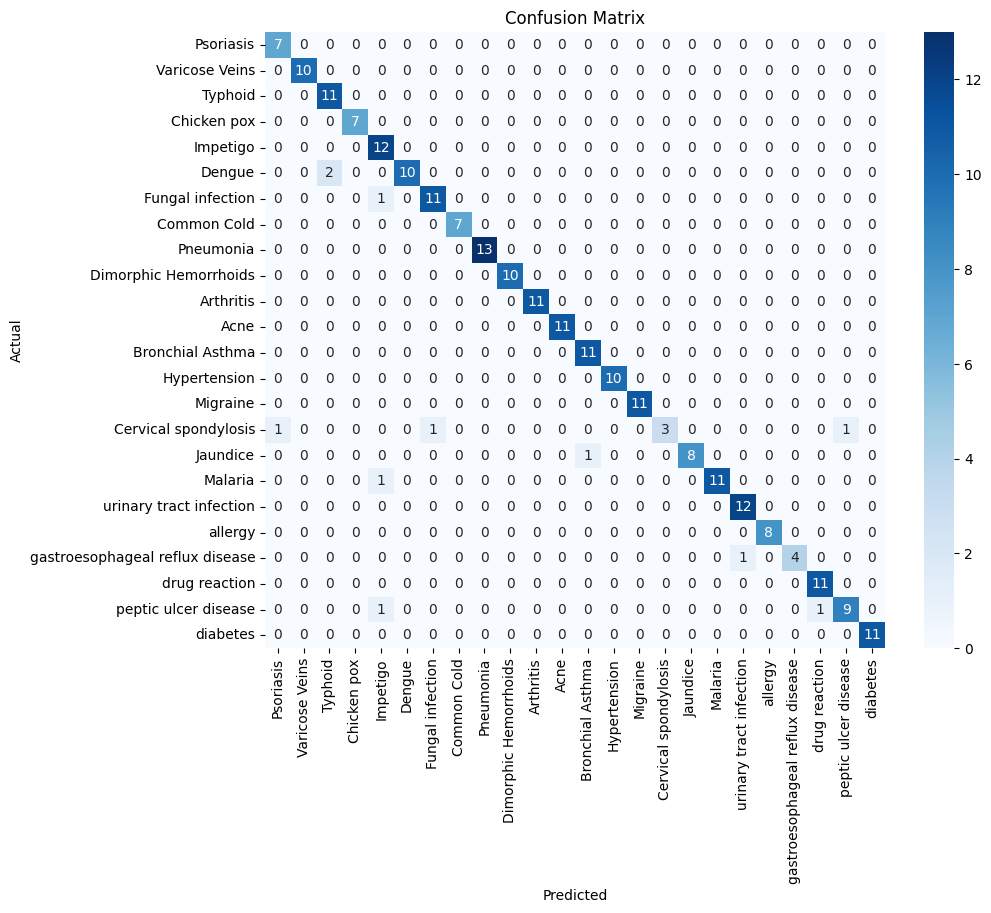

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plotting confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels.unique(), yticklabels=labels.unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Example Usage

In [ ]:
# Example Usage
symptom = "Yellowing of skin and eyes, fatigue"

# Preprocess the input symptom
preprocessed_symptom = preprocess_text(symptom)

# Transform the preprocessed symptom using the same vectorizer used during training
symptom_tfidf = tfidf_vectorizer.transform([preprocessed_symptom])

# Predict the disease
predicted_disease = knn_classifier.predict(symptom_tfidf)
print(f'Predicted Disease: {predicted_disease[0]}')

Predicted Disease: Jaundice


# Use trained model

In [ ]:
import joblib
joblib.dump(knn_classifier, 'model.pkl')

['model.pkl']

In [ ]:
def tdidf(preprocessed_text):
  tfidf_vectorizer = TfidfVectorizer(max_features=1500)  # You can adjust max_features based on your dataset size
  tfidf_vectorizer.fit_transform(preprocessed_symptoms).toarray()
  text_tfidf = tfidf_vectorizer.transform([preprocessed_text])
  return text_tfidf

In [ ]:
model = joblib.load('model.pkl')

# Example Usage
symptom = "Yellowing of skin and eyes, fatigue"

# Preprocess the input symptom
preprocessed_symptom = preprocess_text(symptom)

# Apply preprocessing to symptoms
preprocessed_symptoms = symptoms.apply(preprocess_text)

# Transform the preprocessed symptom using the same vectorizer used during training
symptom_tfidf = tdidf(preprocessed_symptom)

# Predict the disease
predicted_disease = model.predict(symptom_tfidf)
print(f'Predicted Disease: {predicted_disease[0]}')

Predicted Disease: Jaundice


# Disease to Action

In [ ]:
data2 = pd.read_csv('Disease2Action.csv')
data2

,disease,action
0,Psoriasis,"Maintain a healthy lifestyle, take daily baths..."
1,Varicose Veins,"You can ease the pain by exercising, raising y..."
2,Typhoid,You can refer to the pharmacy to get prescribe...
3,Chicken pox,Avoid scratching the skin as it may cause scar...
4,Impetigo,If the infections are minor and haven't spread...
5,Dengue,Consider seeking professional help as you will...
6,Fungal infection,Keep the affected area clean and dry. You can ...
7,Common Cold,"Rest more, drink plenty of liquids, humidify t..."
8,Pneumonia,You can visit to the pharmacy for prescribed a...
9,Dimorphic Hemorrhoids,Eat more foods that are high in fiber. You can...


In [ ]:
action = data2.loc[data2.disease == predicted_disease[0], 'action'].values[0]
action

'Jaundice may caused by many reasons. Please visit your doctor to seek for further medical diagnosis treatment as soon as possible.'